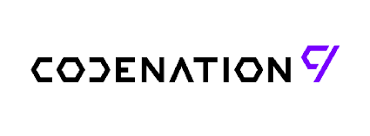

# Desafio 2 - Estatística Descritiva
_________
## Explorar a base de clientes e verificar as pontuações de crédito para cada Estado.
__________


### Base de Dados

O dataset é composto por variáveis relativas à transações comerciais que representassem uma base de cliente de um produto SaaS (Software as a Service). 

**Software as a service (SaaS)**, é uma forma de distribuição e comercialização de software. No modelo SaaS, o fornecedor do software se responsabiliza por toda a estrutura necessária à disponibilização do sistema (servidores, conectividade, cuidados com segurança da informação), e o cliente utiliza o software via internet, pagando um valor pelo serviço (Fonte: Wikipédia, 2019). 


**Descrição dos dados:**

- *'id':* Identificador do cliente

- *'sobrenome':* Sobrenome do cliente

- *'pontuacao_credito':* Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente)

- *'estado_residencia':* Estado de residência do cliente

- *'genero':* Gênero do cliente

- *'nivel_estabilidade':* Nível de estabilidade do cliente

- *'saldo_conta':* Saldo disponível na conta do cliente

- *'numero_produtos':* Número de produtos que o cliente consome

- *'possui_cartao_de_credito':* Possui um cartão de crédito cadastrado

- *'membro_ativo':* Membro acessa e consome frequentemente

>Obs: Os dados são fictícios, mas tentam representar a realidade de uma base de clientes de um produto SaaS. 


### Objetivo

A resposta deve conter os valores da média, mediana, moda e desvio padrão da variável **pontuação de crédito** para cada estado do dataset.

O arquivo para submissão deve estar em formato json, conforme o arquivo exemplo "submission.json".


### Requisitos

Verifique se possui as dependências necessárias abaixo: 

- Python
- Pandas
- Json
- Jupyter Notebook
________

## Set up da análise

In [325]:
# importa as bibliotecas
import pandas as pd
import json
import warnings
warnings.filterwarnings('ignore')

In [4]:
# carrega o dataframe
df = pd.read_csv("desafio_estatistica.csv")

## Análise Exploratória

In [5]:
# visualiza os dados do dataframe
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [6]:
# verifica as características do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [18]:
# estatística descritiva dos dados
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [316]:
# verifica quantos Estados existem nos dataframe
df['estado_residencia'].unique()

array(['SC', 'RS', 'PR'], dtype=object)

## Estatística Descritiva

#### Estrutura da resposta em Json

In [319]:
# importa a estrutua dos dados em Json no qual desafio espera receber como resposta
df_Json = pd.read_json (r'submission.json')
df_Json

,SC,RS,PR
moda,0,0,0
mediana,0,0,0
media,0,0,0
desvio_padrao,0,0,0


#### Função com a análise estatística

In [358]:
# cria uma função para gerar a estatistica descritiva dos dados agrupado por uma atributo
def statistics(i,j):
    return (
        df.groupby(i)[j]
        .agg(moda = lambda x: x
        .mode(), mediana='median', media='mean', desvio_padrao='std')
    ).T

In [359]:
# chama a função definindo os parâmetros, que são as colunas a serem analisadas
df_statistics = statistics('estado_residencia','pontuacao_credito')
df_statistics

estado_residencia,PR,RS,SC
moda,850.000000,850.000000,850.000000
mediana,650.000000,650.000000,653.000000
media,648.961294,651.105143,649.537653
desvio_padrao,98.607186,95.136598,97.233493


#### Junta os resultados obtidos em estatísticas no formato Json

In [334]:
# faz o merge do dataframe df_statistics com a estrutura do df_Json
# como os index de ambos dataframe são iguais, basta resetar um e manter o outro no retorno
statistics_Json = (
    df_Json
    .merge(df_statistics.reset_index(),on=['SC','RS','PR'],how="right")
    .set_index('index')
)

# visualiza o dataframe
statistics_Json

,SC,RS,PR
index,,,
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


In [336]:
# retirando o nome index para ter uma visualização mais "limpa"
statistics_Json.index.name = None
statistics_Json

,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


#### Exporta o arquivo no formato Json

In [333]:
statistics_Json.to_json("submission.json")

________

## Pós-Desafio

Em Python, uma função é uma sequência de comandos que executa alguma tarefa e que é dado um nome. 

A grande vantagem de definir funções é que auxiliam na solução de um problema organizando em pedaços de programas.

Com a definição da função para as análises da estatística descritiva, podemos agora escolher outros parâmetros e gerar uma nova análise dos dados.

Os parametrôs da função **statistics (i, j)**, são:
- **i =** a coluna a ser agrupada e
- **j =** a coluna a ser gerada a estatística. 
_____

In [337]:
# relembrando a estrutura dos dados
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


_____
### Tipo de Sexo (F/M)

- #### Pontuações de Crédito

In [349]:
statistics(i='genero', j='pontuacao_credito')

genero,F,M
moda,850.000000,850.000000
mediana,650.000000,652.000000
media,648.607666,650.785281
desvio_padrao,97.274798,96.854033


- #### Saldo em Conta

In [350]:
statistics(i='genero',j='saldo_conta')

genero,F,M
moda,0.000000,0.000000
mediana,96553.520000,97786.080000
media,75286.439897,77475.336489
desvio_padrao,62249.159146,62524.276353


___
### Status do Membro
>Ativo = 1 

>Inativo = 0

- #### Pontuações de Crédito

In [351]:
statistics(i='membro_ativo', j='pontuacao_credito')

membro_ativo,0,1
moda,850.000000,850.000000
mediana,648.000000,654.000000
media,646.407321,653.006416
desvio_padrao,97.768758,96.256341


- #### Saldo em Conta

In [354]:
statistics(i='membro_ativo',j='saldo_conta')

membro_ativo,0,1
moda,0.000000,0.000000
mediana,98205.770000,96759.420000
media,76886.316041,76077.103760
desvio_padrao,62635.835093,62187.317609


_____
## Conclusão

O Score mínimo para aprovação é 80% e a **nota final obtida foi de 100%**.  

Alcançado o objetivo do desafio de estatística descritiva em Python da Semana 3 do Programa de aceleração em Data Science da Codenation.

Além da revisão do conhecimento da **Estatística Descritiva**, que é o ramo da Estatística responsável por descrever e sumarizar o conjunto de dados. 

Os tipos de medidas existentes da Estatística Descritiva e suas classes. 

Neste desafio foram abordados as seguintes classes:

 - **Medida de Posição:** 
     - *Média Aritmética* - que constitui um ponto central do conjunto de dados.
     - *Mediana* - o valor mediano será o termo de ordem, ou seja, a posição na qual o número de encontra.
     - *Moda* - é o valor que apresenta a maior frequência no conjunto de dados. 


 - **Medida de Dispersão:** 
    - *Desvio Padrão* - é o erro médio de todos os dados, ou seja, indica o afastamento dos valores observados em relação a média aritmética.
_____